# TikTok imports

In [2]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from tqdm.auto import tqdm

import requests
from datetime import datetime

In [3]:
from ensembledata.api import EDClient

In [19]:
# initialize the ensembledata client
client = EDClient("M2OK8yIEX5UjTkfA")

# get a free token at https://dashboard.ensembledata.com/register
# free trial of 50 units per day for 7 days, starting 23/11/24
#
# costs:
#  - 1 unit = 200 posts in full_hashtag_search :)
#  - 1 unit = 20 posts in hashtag_search
#  - 1 unit = 20 posts in keyword_search or full_keyword_search :(
#  - 1 unit = 30 comments to a post
#  - 1 unit = 30 replies to a comment
#
# documentation available at https://ensembledata.com/apis/docs#tag/Tiktok
# and https://github.com/EnsembleData/tiktok-scraper
# source code available at
# https://github.com/EnsembleData/ensembledata-python/tree/main/ensembledata/api

# Read posts from TikTok

Hashtag search (200 posts at the cost of 1 unit)

In [20]:
# read posts related to an hashtag
result = client.tiktok.full_hashtag_search(
                hashtag = "hurricaneian", # hashtag name
                days = 900,   # ADJUST FOR HURRICANE DATE !!!!!!
                remap_output = True, # False for mobile app, True for web
                max_cursor = 4000) # max number of posts fetched,
                                  # cost is 1 unit per 200 posts

In [21]:
# convert json to dataframe
df = pd.json_normalize(result.data["posts"])

In [ ]:
# extract relevant info
df = df[['itemInfos.id', 'itemInfos.createTime', 'itemInfos.authorId',
         'itemInfos.text', 'itemInfos.video.urls', 'itemInfos.shareCount',
         'itemInfos.playCount', 'itemInfos.commentCount']]

# rename columns
df.columns = ['id', 'createTime', 'authorId', 'text', 'video.urls',
              'shareCount', 'playCount', 'commentCount']

# format time to date in string format
df["createTime"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["createTime"]]

In [11]:
# save
df_hashtag = df
df_hashtag.to_csv('ian__tiktok_hashtag_posts.csv', index=False)

NameError: name 'df' is not defined

In [14]:
for i in range(len(df_hashtag)):
  if df_hashtag["createTime"][i]<"2022-09-14":
    df_hashtag=df_hashtag.drop(i)
  if df_hashtag["createTime"][i]>"2022-10-28":
    df_hashtag=df_hashtag.drop(i)

In [15]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
2,7148581794428816683,2022-09-29,6618333664294895621,#FortMyers #HurricaneIan #SWFL #Boat,['https://v77.tiktokcdn-eu.com/a4eae9712fc3d0b...,85321,15116676,17082
3,7149273125157424389,2022-09-30,6666826928797777925,NaN,['https://v45.tiktokcdn-eu.com/74a9e9cc854c19c...,306,523668,13212
4,7149252179885346090,2022-09-30,6943670325058913285,Took a Helicopter to Sanibel Island today 😞#hu...,['https://v77.tiktokcdn-eu.com/c0350578b16e648...,148561,12620461,12378
5,7151122593108741422,2022-10-05,6805008981594293254,#DeSantis ##desantis2024##floridacheck##Overwa...,['https://v45.tiktokcdn-eu.com/e791fa7e6878006...,30102,2569659,12193
8,7151582807192587566,2022-10-07,6806867068652487685,#naples #naplesflorida #hurricane #hurricaneian,['https://v77.tiktokcdn-eu.com/71140fba7c09ce2...,12821,6387008,9656
...,...,...,...,...,...,...,...,...
372,7147963178058648875,2022-09-27,6747490126719206405,NIGHT BEFORE THE 130 MPH HURRICANE😭 #dayinmyli...,['https://v77.tiktokcdn-eu.com/e932a34f8fc0348...,73,897651,1014
373,7148596654097124651,2022-09-29,6854959161840305158,#ian #hurricaneian,['https://v45.tiktokcdn-eu.com/b18286029a7aa94...,3226,2246473,1012
374,7148893485322489131,2022-09-29,6710314922751181830,Have you ever been in a hurricane before? ⛈ @f...,['https://v45.tiktokcdn-eu.com/862cf9188ec69e2...,648,2650195,1008
375,7148802438617779502,2022-09-29,6642506333986095109,Jk babe ily 🫶🏻 #lineman #linemen #linewife #hu...,['https://api16-normal-c-useast2a.tiktokv.com/...,1118,519064,1007


Keyword search (100 posts at the cost of 5 units) - limited to 180 days!

# Read comments from TikTok

Comments search

In [13]:
df_hashtag = pd.read_csv('C:/Users/alepa/PycharmProjects/pythonProject/Network Science/Project/ian__tiktok_hashtag_posts.csv')

# order by comment count
df_hashtag = df_hashtag.sort_values(by=['commentCount'], ascending=False).reset_index(drop=True)

# delete posts with less than 30 comments
df_hashtag = df_hashtag[df_hashtag['commentCount']>=1000]

# state how many
print(f'{len(df_hashtag)} posts for hashtags with more than 30 comments')


377 posts for hashtags with more than 30 comments


In [16]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
2,7148581794428816683,2022-09-29,6618333664294895621,#FortMyers #HurricaneIan #SWFL #Boat,['https://v77.tiktokcdn-eu.com/a4eae9712fc3d0b...,85321,15116676,17082
3,7149273125157424389,2022-09-30,6666826928797777925,NaN,['https://v45.tiktokcdn-eu.com/74a9e9cc854c19c...,306,523668,13212
4,7149252179885346090,2022-09-30,6943670325058913285,Took a Helicopter to Sanibel Island today 😞#hu...,['https://v77.tiktokcdn-eu.com/c0350578b16e648...,148561,12620461,12378
5,7151122593108741422,2022-10-05,6805008981594293254,#DeSantis ##desantis2024##floridacheck##Overwa...,['https://v45.tiktokcdn-eu.com/e791fa7e6878006...,30102,2569659,12193
8,7151582807192587566,2022-10-07,6806867068652487685,#naples #naplesflorida #hurricane #hurricaneian,['https://v77.tiktokcdn-eu.com/71140fba7c09ce2...,12821,6387008,9656
...,...,...,...,...,...,...,...,...
372,7147963178058648875,2022-09-27,6747490126719206405,NIGHT BEFORE THE 130 MPH HURRICANE😭 #dayinmyli...,['https://v77.tiktokcdn-eu.com/e932a34f8fc0348...,73,897651,1014
373,7148596654097124651,2022-09-29,6854959161840305158,#ian #hurricaneian,['https://v45.tiktokcdn-eu.com/b18286029a7aa94...,3226,2246473,1012
374,7148893485322489131,2022-09-29,6710314922751181830,Have you ever been in a hurricane before? ⛈ @f...,['https://v45.tiktokcdn-eu.com/862cf9188ec69e2...,648,2650195,1008
375,7148802438617779502,2022-09-29,6642506333986095109,Jk babe ily 🫶🏻 #lineman #linemen #linewife #hu...,['https://api16-normal-c-useast2a.tiktokv.com/...,1118,519064,1007


In [17]:
df_hashtag['createTime'].unique()

array(['2022-09-29', '2022-09-30', '2022-10-05', '2022-10-07',
       '2022-10-01', '2022-09-28', '2022-10-03', '2022-09-27',
       '2022-10-23', '2022-10-10', '2022-09-26', '2022-10-19',
       '2022-10-02', '2022-10-16', '2022-10-04', '2022-09-25',
       '2022-10-11', '2022-10-06', '2022-09-24', '2022-10-22',
       '2022-10-09', '2022-10-15', '2022-10-21', '2022-10-14',
       '2022-10-20', '2022-10-08'], dtype=object)

In [18]:
len(df_hashtag['createTime'].unique()) # we take the comments of 26 days

26

In [19]:
df_hashtag = df_hashtag.loc[df_hashtag.groupby('createTime')['commentCount'].idxmax()]

In [20]:
# order df_hashtag by date
df_hashtag = df_hashtag.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

df_hashtag

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7146891037787835694,2022-09-24,6865054517386806277,Florida greeting hurricanes #hurricane #florid...,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,13401,1346460,1785
1,7147128979391139114,2022-09-25,6935805351829685254,#hurricaneian #ian #florida #stateofemergency,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,9047,6085682,3099
2,7147742399043931438,2022-09-26,6980433469270033413,#stormwork #hurricane #hurricaneian #florida #...,['https://v77.tiktokcdn-eu.com/4b110c7783bca72...,13258,2484533,5629
3,7147826662787517742,2022-09-27,6758580322201814022,😂😂 Nah people in Florida take evey Hurricane a...,['https://v77.tiktokcdn-eu.com/793d2a53c458230...,11372,1372869,6242
4,7148507639553576235,2022-09-28,7056593308990440494,RESCUE HELP NEEDED AS SOON AS POSSIBLE!! 3 ad...,['https://v77.tiktokcdn-eu.com/68b77fc093c99f4...,9983,1798567,8863
5,7148581794428816683,2022-09-29,6618333664294895621,#FortMyers #HurricaneIan #SWFL #Boat,['https://v77.tiktokcdn-eu.com/a4eae9712fc3d0b...,85321,15116676,17082
6,7149273125157424389,2022-09-30,6666826928797777925,NaN,['https://v45.tiktokcdn-eu.com/74a9e9cc854c19c...,306,523668,13212
7,7149626618011667758,2022-10-01,6951041408883491845,Fort Myers Beach before and after Hurricane Ia...,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,58122,12862858,9081
8,7149856973113003269,2022-10-02,6850511303556383750,🌪️ #fyp #uk #usa #hurricaneian,['https://v77.tiktokcdn-eu.com/2566cd082a406d5...,3404,1822982,3991
9,7150048060478115118,2022-10-03,6991514324134413318,Inside a flooded house #hurricaneian #rain #st...,['https://v77.tiktokcdn-eu.com/cdd905623846926...,15683,7416347,6834


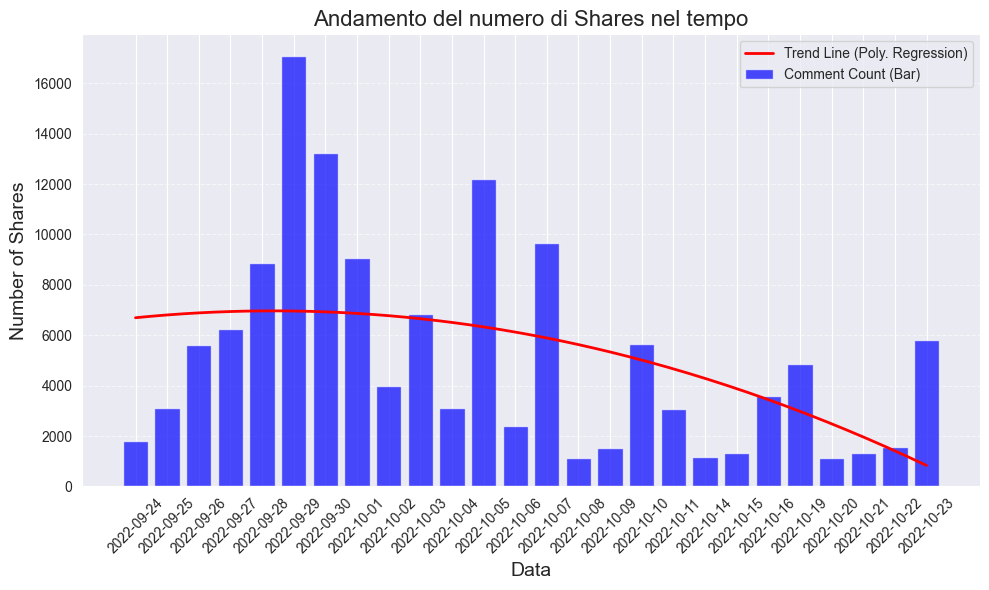

In [26]:
import numpy as np

# Convert time to numeric if needed (e.g., integer indices for regression)
x = np.arange(len(df_hashtag["createTime"]))
y = df_hashtag["commentCount"]

# Fit a polynomial regression (degree 5 for smooth curve)
coeffs = np.polyfit(x, y, deg=5)
poly = np.poly1d(coeffs)

# Generate smooth values for the regression line
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)

plt.figure(figsize=(10, 6))

# Bar chart
plt.bar(df_hashtag["createTime"], y, color='b', alpha=0.7, label='Comment Count (Bar)')

# Plot the polynomial regression line
plt.plot(x_smooth, y_smooth, color='r', linewidth=2, label='Trend Line (Poly. Regression)')

# Customize the plot
plt.title('Shares per Time', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=x, rotation=45)
plt.legend()  # Add legend

# Show the plot
plt.tight_layout()
plt.show()


In [64]:
# WE DO THIS TOGETHER
## YOU HAVE USED 20 UNITS IN ORDER TO RETRIEVE POSTS (OUT OF 50)

## COMMENTS TAKE A LOT OF UNITS TO RETRIEVE
## EACH DATASET ITERATES THROUGH POSTS, SO EACH HURRICANE HAS DIFFERENT COSTS

## DO THE MATH TO USE LESS THAN 50 UNITS OR IT WILL NOT RUN AND EMPTY YOUR TOKENS!
## SEE THE LAST PRINTED DATASET TO CHECK HOW MANY ROWS YOU HAVE TO ITERATE THROUGH
#---

comments_to_retrieve = 30

comments = list()
for i in range(len(df_hashtag)):
    aweme_id = df_hashtag["id"][i]
    cursor = None
    for _ in range(int(comments_to_retrieve/30)):
        result = client.tiktok.post_comments(
            aweme_id = aweme_id,
            cursor = cursor
        )
        comments.extend(result.data["comments"])
        cursor = result.data.get("nextCursor")
        if cursor is None:
            break

In [65]:
# convert json to dataframe
df = pd.json_normalize(comments)

# extract relevant info
df = df[['aweme_id', 'cid', 'create_time', 'text', 'reply_comment_total']]

# format time to date in string format
df["create_time"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["create_time"]]

# order by number of replies
df = df.sort_values(by=['reply_comment_total'], ascending=False).reset_index(drop=True)

# save
df_comments = df
df_comments.to_csv('ian_tiktok_hashtag_comments.csv', index=False)

In [67]:
df_comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7153080462712245546,7154142281814688558,2022-10-14,UPDATE: Rogue was found today and he has passe...,245
1,7149856973113003269,7149867032770069253,2022-10-02,Schools will remain open,144
2,7150685798008999211,7150761601004077870,2022-10-04,He’s doing an excellent job and Florida is gra...,140
3,7149626618011667758,7149662955381080837,2022-10-01,I think there is some misleading camera work a...,127
4,7147742399043931438,7147797067656987438,2022-09-26,We thank everyone coming into the storm to hel...,96
...,...,...,...,...,...
501,7157124572595244330,7157452381259596587,2022-10-22,"Ok, this is my grandpa now, I just love this f...",0
502,7157124572595244330,7157153632685687598,2022-10-22,That’s a miracle. ♥️,0
503,7146891037787835694,7146976940393382699,2022-09-24,hell yeah 😎,0
504,7157615871140285742,7157722167223698218,2022-10-23,"Yo, yo, What did Ethan say when you called him?",0
